# PFAM Annotation Module

Este notebook demuestra el uso de los dos métodos principales del módulo `pfam_annotation.py` de pyMut.


## 1. Importar librerías y cargar datos


In [1]:
import sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Añadir el directorio src al path para importar pyMut
sys.path.insert(0, '../../../src')

# Importar pyMut
from pyMut import read_maf
from pyMut.utils.database import build_embedded_db, connect_db

# Cargar datos de ejemplo
maf_file = "../../../src/pyMut/data/examples/MAF/tcga_laml_VEP_annotated.maf.gz"
maf_data = read_maf(maf_file,assembly="37")

# Configurar base de datos PFAM
try:
    build_embedded_db(force_rebuild=False)
except:
    pass


2025-07-31 21:44:01,192 | INFO | pyMut.input | Starting MAF reading: ../../../src/pyMut/data/examples/MAF/tcga_laml_VEP_annotated.maf.gz
2025-07-31 21:44:01,195 | INFO | pyMut.input | Reading MAF with 'pyarrow' engine…
2025-07-31 21:44:01,213 | INFO | pyMut.input | Reading with 'pyarrow' completed.
2025-07-31 21:44:01,220 | INFO | pyMut.input | Detected 193 unique samples.
2025-07-31 21:44:01,318 | INFO | pyMut.input | Consolidating duplicate variants across samples...
2025-07-31 21:44:01,334 | INFO | pyMut.input | Consolidating variants using vectorized operations...
2025-07-31 21:44:58,388 | INFO | pyMut.input | Variant consolidation completed in 57.07 seconds
2025-07-31 21:44:58,396 | INFO | pyMut.input | Consolidated 2431 rows into 2091 unique variants
2025-07-31 21:44:58,411 | INFO | pyMut.input | Saving to cache: ../../../src/pyMut/data/examples/MAF/.pymut_cache/tcga_laml_VEP_annotated.maf_1832124b9ca93d79.parquet
2025-07-31 21:44:58,492 | INFO | pyMut.input | MAF processed succe

✅ Database already exists at /home/luisruimore/Escritorio/TFG/docs/examples/analysis/../../../src/pyMut/data/resources/data.duckdb


## 2. Uso del método annotate_pfam()


In [2]:
# Anotar variantes con dominios PFAM
maf_data = maf_data.annotate_pfam()

# Mostrar ejemplos de anotaciones
if 'pfam_id' in maf_data.data.columns:
    pfam_examples = maf_data.data[
        maf_data.data['pfam_id'].notna()
    ][['Hugo_Symbol', 'Protein_Change', 'uniprot', 'aa_pos', 'pfam_id', 'pfam_name']].head(10)
    display(pfam_examples)


2025-07-31 21:45:04,919 | INFO | pyMut.analysis.pfam_annotation | UniProt resolution summary:
2025-07-31 21:45:04,919 | INFO | pyMut.analysis.pfam_annotation |    Total identifiers processed: 676
2025-07-31 21:45:04,920 | INFO | pyMut.analysis.pfam_annotation |    Direct accessions: 669
2025-07-31 21:45:04,920 | INFO | pyMut.analysis.pfam_annotation |    Resolved via short_name: 0
2025-07-31 21:45:04,920 | INFO | pyMut.analysis.pfam_annotation |    Resolved via external ID: 0
2025-07-31 21:45:04,920 | INFO | pyMut.analysis.pfam_annotation |    Unresolved: 7
2025-07-31 21:45:05,668 | INFO | pyMut.analysis.pfam_annotation | Variantes anotadas con PFAM: 317/775
2025-07-31 21:45:05,832 | INFO | pyMut.analysis.pfam_annotation | 
Final annotation summary:
2025-07-31 21:45:05,832 | INFO | pyMut.analysis.pfam_annotation |    Total variants processed: 2,091
2025-07-31 21:45:05,833 | INFO | pyMut.analysis.pfam_annotation |    UniProt identifiers resolved: 669/676
2025-07-31 21:45:05,833 | INFO |

,Hugo_Symbol,Protein_Change,uniprot,aa_pos,pfam_id,pfam_name
0,KIAA1529,p.T431T,None,431.0,PF00025,PF00025
1,KIAA1529,p.R581H,Q9BS26,581.0,PF00561,PF00561
2,TBC1D2,p.L593R,None,593.0,PF00629,PF00629
3,LPPR1,p.T325I,None,325.0,PF02106,PF02106
4,BAAT,p.T376M,O95347,376.0,PF02114,PF02114
5,FKTN,<NA>,None,NaN,PF03765,PF03765
6,ZNF462,p.R1680C,Q9Y2D5,1680.0,PF03770,PF03770
7,ACTL7A,p.G426R,None,426.0,PF04080,PF04080
8,UGCG,p.Y47Y,A0A1B0GUV7,47.0,PF08441,PF08441
9,C9orf43,p.T181A,Q13219,181.0,PF08526,PF08526


## 3. Uso del método pfam_domains()


,pfam_id,pfam_name,n_genes,n_variants
138,PF04118,PF04118,7,8
51,PF00520,PF00520,6,6
36,PF00271,PF00271,6,6
186,PF13853,PF13853,3,5
152,PF07679,PF07679,3,5
13,PF00063,PF00063,4,4
7,PF00028,PF00028,4,4
35,PF00270,PF00270,4,4
15,PF00069,PF00069,4,4
22,PF00096,PF00096,3,3


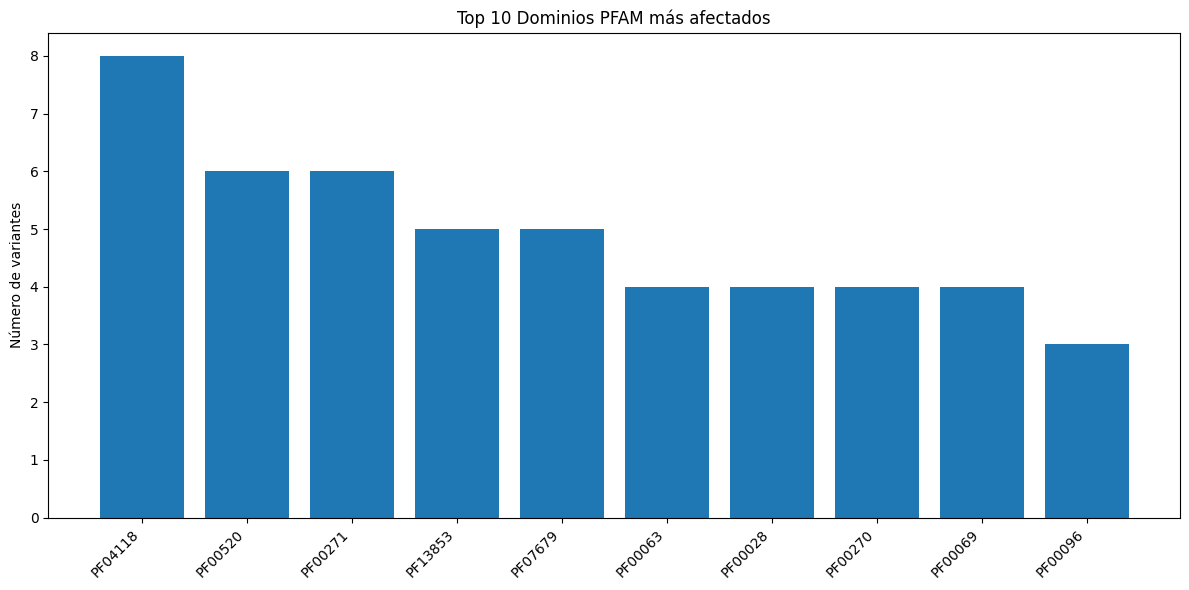

,uniprot,aa_pos,pfam_id,pfam_name,n_variants,n_genes
0,A0A0B4J262,28.0,PF06327,PF06327,1,1
33,Q14678,405.0,PF00271,PF00271,1,1
35,Q5JUK3,266.0,PF01040,PF01040,1,1
36,Q6ZU80,28.0,PF00041,PF00041,1,1
37,Q8NEA6,741.0,PF00027,PF00027,1,1
38,Q8NFX7,87.0,PF00028,PF00028,1,1
39,Q8NHH1,374.0,PF15081,PF15081,1,1
40,Q8WXB1,274.0,PF00520,PF00520,1,1
41,Q92688,43.0,PF03250,PF03250,1,1
42,Q96FT7,17.0,PF04118,PF04118,1,1


In [3]:
# Resumen por dominio PFAM
pfam_summary = maf_data.pfam_domains(
    summarize_by='PfamDomain',
    top_n=10,
    include_synonymous=False
)

if not pfam_summary.empty:
    display(pfam_summary)

    # Visualización
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(pfam_summary)), pfam_summary['n_variants'])
    plt.xticks(range(len(pfam_summary)), pfam_summary['pfam_name'], rotation=45, ha='right')
    plt.ylabel('Número de variantes')
    plt.title('Top 10 Dominios PFAM más afectados')
    plt.tight_layout()
    plt.show()

# Resumen por posición de aminoácido
aa_summary = maf_data.pfam_domains(
    summarize_by='AAPos',
    top_n=10,
    include_synonymous=False
)

if not aa_summary.empty:
    display(aa_summary)


In [4]:
# Intentar construir la base de datos embebida
print("Configurando base de datos PFAM...")
try:
    # Esto creará la base de datos si no existe
    build_embedded_db(force_rebuild=False)
    print("✓ Base de datos PFAM configurada correctamente")
except Exception as e:
    print(f"⚠️  Error configurando base de datos: {e}")
    print("Continuaremos con las funciones disponibles...")

# Intentar conectar a la base de datos
try:
    db_conn = connect_db()
    print("✓ Conexión a base de datos establecida")

    # Verificar tablas disponibles
    tables = db_conn.execute("SHOW TABLES").fetchall()
    print(f"Tablas disponibles: {[table[0] for table in tables]}")

    db_conn.close()
except Exception as e:
    print(f"⚠️  Error conectando a base de datos: {e}")
    db_conn = None


Configurando base de datos PFAM...
✅ Database already exists at /home/luisruimore/Escritorio/TFG/docs/examples/analysis/../../../src/pyMut/data/resources/data.duckdb
✓ Base de datos PFAM configurada correctamente
✓ Conexión a base de datos establecida
Tablas disponibles: ['meta', 'pfam', 'xref']
